In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py
import os
import string
import urllib.request
from bs4 import BeautifulSoup
from pprint import pprint as pp
import colorama
from colorama import Fore, Style
%matplotlib inline

<font face="微软雅黑" size=5 color=#A52A2A >Task1: Data collection
<font face="微软雅黑" size=3 color=BLACK>    
The requirement is to get data based on **three** target classes. To make it more clear, I will firstly store the whole dataset as \
**raw_news.json**, then store targetted dataset as **news_used.json** for any possible comparsion.

<font face="微软雅黑" size=5 color=ORANGE>Step 1: Get the whole dataset **raw_news.json**

In [2]:
def getLinkinfo(endpoint): #html request
    response = urllib.request.urlopen(endpoint)
    link_info = response.read().decode("utf-8")
    return link_info

In [3]:
def getArticle(start,total_page): #package news stories under all pages given the 'start_point' and 'total page quantity'
    link_info=getLinkinfo(start)
    soup=BeautifulSoup(link_info,'html.parser')
    ll=[]
    for page_index in range(total_page):
        xs=soup.select('.article')
        for x in xs:
            news={}
            news['title']=str(x.a.text)
            news['category']=str(x.select("p")[1].text.split(' ')[1])
            news['snippet']=str(x.select_one('p.snippet').text)
            ll.append(news)
            ks=soup.find_all('a',class_='page-link')[-2]['href'] 
            #get next page, the value of ks is like 'month-jan-002'
        text=getLinkinfo(main_endpoint+'/'+ks)
        soup=BeautifulSoup(text,'html.parser')
    return ll

In [4]:
main_endpoint='http://mlg.ucd.ie/modules/COMP41680/assignment2'
text=getLinkinfo(main_endpoint+'/'+'index.html')
soup=BeautifulSoup(text,'html.parser')
list_elements=soup.select('.list-group a') #get all the first page of each month-related link
print("News story information start point is shown below, click for details:")
r_list=[] #to contain start point resource of all months
for element in list_elements:
    html_file=element.get('href') #value is something like 'month-jan-001.html'
    print(main_endpoint+"/"+html_file)
    text=getLinkinfo(main_endpoint+'/'+html_file)
    soup=BeautifulSoup(text,'html.parser')
    index_total=int(soup.find_all('h4',class_='results')[0].text.split('of')[1]) #get total page index
    print('link above contain '+str(index_total)+' pages')
    r_list.append(main_endpoint+"/"+html_file)

News story information start point is shown below, click for details:
http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jan-001.html
link above contain 31 pages
http://mlg.ucd.ie/modules/COMP41680/assignment2/month-feb-001.html
link above contain 30 pages
http://mlg.ucd.ie/modules/COMP41680/assignment2/month-mar-001.html
link above contain 28 pages
http://mlg.ucd.ie/modules/COMP41680/assignment2/month-apr-001.html
link above contain 25 pages
http://mlg.ucd.ie/modules/COMP41680/assignment2/month-may-001.html
link above contain 27 pages
http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jun-001.html
link above contain 28 pages
http://mlg.ucd.ie/modules/COMP41680/assignment2/month-jul-001.html
link above contain 28 pages
http://mlg.ucd.ie/modules/COMP41680/assignment2/month-aug-001.html
link above contain 26 pages
http://mlg.ucd.ie/modules/COMP41680/assignment2/month-sep-001.html
link above contain 27 pages
http://mlg.ucd.ie/modules/COMP41680/assignment2/month-oct-001.html
link abo

In [5]:
month1=getArticle(r_list[0],31) 
pp(month1)
#This is to hint the first link news resource under all pages successfully collected

[{'category': 'UK-News',
  'snippet': 'The archbishop of Canterbury will urge people to make personal '
             'connections with others in 2020 to create a new unity in a '
             'divided society. In his new …',
  'title': "Let's resolve to reconnect, says Welby in new year message"},
 {'category': 'Books',
  'snippet': 'Every year, about this time, my Instagram feed fills up with '
             'pictures of books. They’re piled somewhere between five and ten '
             'inches high, sometimes st …',
  'title': "Be honest. You're not going to read all those books on your "
           'holiday, are you?'},
 {'category': 'Music',
  'snippet': 'Mariah Carey’s Twitter account appeared to have been hacked late '
             'Tuesday afternoon, sharing numerous racist slurs and comments '
             'with the singer’s 21.4 …',
  'title': "Mariah Carey's Twitter account hacked on New Year's Eve"},
 {'category': 'Life-and-Style',
  'snippet': 'The last time I felt joy was a

  'title': "'I don't blame them': readers on Harry and Meghan"},
 {'category': 'Music',
  'snippet': 'Summary: The Brodsky Quartet have taken their time over the '
             'Beethoven quartets. In 2006, they released a disc of two of the '
             'Rasumovsky quartets, Opp 59 Nos 2 a …',
  'title': 'Beethoven: The Late Quartets review – serene and assured '
           'performances'},
 {'category': 'UK-News',
  'snippet': 'A fresh attempt to sue Libya for supplying the IRA with the '
             'plastic explosive Semtex during the Troubles is being launched '
             'by victims and the bereaved …',
  'title': 'Fresh attempt to sue Libya for supplying IRA with Semtex '
           'explosive'},
 {'category': 'Politics',
  'snippet': 'The Labour leadership candidate Emily Thornberry has given '
             'Jeremy Corbyn “0 out of 10” for his performance during the '
             'general election. The shadow for …',
  'title': "Thornberry gives Corbyn '0 out of 10' for 

 {'category': 'Sport',
  'snippet': 'Summary: Carlos Beltran is out as manager of the New York Mets '
             'before managing even a single game, the latest fallout from the '
             'Houston Astros’ sign-stealing sc …',
  'title': "Mets' Beltran out before managing a single game in wake of Astros "
           'scandal'},
 {'category': 'UK-News',
  'snippet': 'The fire service’s average response times to serious fires is '
             'more than half a minute longer than it was five years ago, '
             'according to the latest Home …',
  'title': 'Fire services: 999 callers waiting longer than five years ago'},
 {'category': 'Business',
  'snippet': 'Sales at Primark’s UK stores went backwards at Christmas in a '
             'further sign of the toll taken on fashion retailers by grim '
             'market conditions over the t …',
  'title': 'Primark sales down after challenging Christmas for UK retail'},
 {'category': 'Business',
  'snippet': 'Nobody doubts the a

  'snippet': 'Summary: Bringing Wes Anderson’s vision for The Grand Budapest '
             'Hotel to life seems to have been a labour of love for all '
             'involved. For none more so, perhaps, t …',
  'title': 'From fake maps to golden tickets: the film props of artist Annie '
           'Atkins'},
 {'category': 'Music',
  'snippet': 'Sweltering heat, a crowded Manhattan tenement of people failing '
             'to mind each other’s business, Kurt Weill’s Street Scene (1946) '
             'bristles with disconte …',
  'title': 'The week in classical: Street Scene; SCO/ Emelyanychev – review'},
 {'category': 'UK-News',
  'snippet': 'Boris Johnson “reiterated the need” for the suspect charged with '
             'causing the death of Harry Dunn to return to the UK during a '
             'phone call with Donald T …',
  'title': 'Boris Johnson presses Trump over Harry Dunn suspect returning to '
           'UK'},
 {'category': 'Sport',
  'snippet': 'Finally, here is Russell J

<font face="微软雅黑" size=3 color=BLUE>**List the first and last element for check**
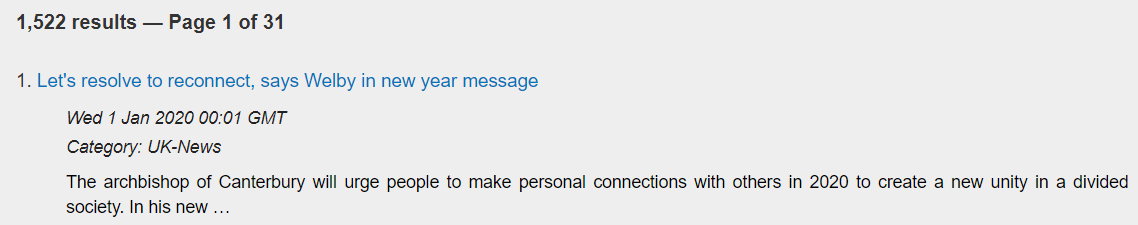

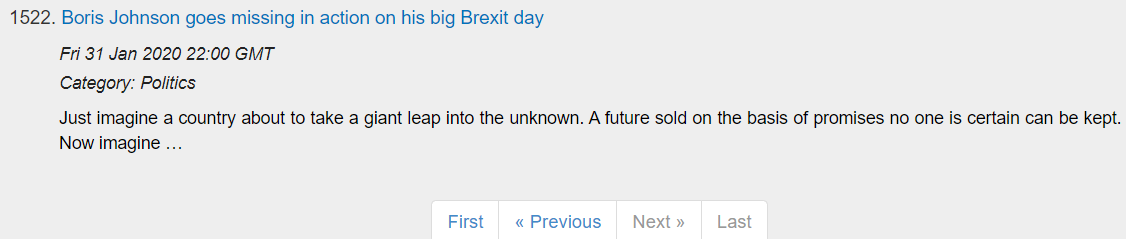

In [6]:
#collect all months' news story
month2=getArticle(r_list[1],30) 
month3=getArticle(r_list[2],28) 
month4=getArticle(r_list[3],25) 
month5=getArticle(r_list[4],27) 
month6=getArticle(r_list[5],28) 
month7=getArticle(r_list[6],28) 
month8=getArticle(r_list[7],26) 
month9=getArticle(r_list[8],27) 
month10=getArticle(r_list[9],28) 
month11=getArticle(r_list[10],27) 
month12=getArticle(r_list[11],25)
all=month1+month2+month3+month4+month5+month6+month7+month8+month9+month10+month11+month12

In [7]:
from requests import get
from json import dumps
import json
import nltk
import codecs

In [8]:
def create_file (file_name, data): #create .json file for the raw data
    with codecs.open(file_name, 'w','utf-8') as outfile:
        json.dump(data, outfile)
    print(Fore.BLUE + 'Dataset saved in "%s"'%(file_name))
    outfile.close()

def load_file(file_name): #print the .json file, the first and last are month1 first and month12 last element respectively
    with codecs.open(file_name,'r','utf-8') as json_file:
        data = json.load(json_file)
        new_data=json.dumps(data,indent = 2,ensure_ascii=False)
    print(Fore.BLUE + 'Dataset "%s" loaded as below:'%(file_name))
    print(Fore.BLACK+ new_data)
    json_file.close()
    return data

In [9]:
create_file('raw_news.json',all)
news=load_file('raw_news.json')

Dataset saved in "raw_news.json"
Dataset "raw_news.json" loaded as below:
[
  {
    "title": "Let's resolve to reconnect, says Welby in new year message",
    "category": "UK-News",
    "snippet": "The archbishop of Canterbury will urge people to make personal connections with others in 2020 to create a new unity in a divided society. In his new …"
  },
  {
    "title": "Be honest. You're not going to read all those books on your holiday, are you?",
    "category": "Books",
    "snippet": "Every year, about this time, my Instagram feed fills up with pictures of books. They’re piled somewhere between five and ten inches high, sometimes st …"
  },
  {
    "title": "Mariah Carey's Twitter account hacked on New Year's Eve",
    "category": "Music",
    "snippet": "Mariah Carey’s Twitter account appeared to have been hacked late Tuesday afternoon, sharing numerous racist slurs and comments with the singer’s 21.4 …"
  },
  {
    "title": "The joy audit: how to have more fun in 2020",
    "ca

In [10]:
df=pd.DataFrame(news)
df.head(5)

title        category  \
0  Let's resolve to reconnect, says Welby in new ...         UK-News   
1  Be honest. You're not going to read all those ...           Books   
2  Mariah Carey's Twitter account hacked on New Y...           Music   
3        The joy audit: how to have more fun in 2020  Life-and-Style   
4  Providence Lost by Paul Lay review – the rise ...           Books   

                                             snippet  
0  The archbishop of Canterbury will urge people ...  
1  Every year, about this time, my Instagram feed...  
2  Mariah Carey’s Twitter account appeared to hav...  
3  The last time I felt joy was at an event that ...  
4  The only public execution of a British head of...

<font face="微软雅黑" size=5 color=ORANGE>Step 2: Get the dataset to use: **news_used.json** \
<font face="微软雅黑" size=3 color=BLACK>
The target categories I select: **Film**,**Music**,**UK-News**

In [11]:
news_target=df[(df['category']=='Film')|(df['category']=='Music')|(df['category']=='UK-News')] 
target_list=news_target.to_dict(orient='records')
create_file('news_used.json',target_list)
news_use=load_file('news_used.json')

Dataset saved in "news_used.json"
Dataset "news_used.json" loaded as below:
[
  {
    "title": "Let's resolve to reconnect, says Welby in new year message",
    "category": "UK-News",
    "snippet": "The archbishop of Canterbury will urge people to make personal connections with others in 2020 to create a new unity in a divided society. In his new …"
  },
  {
    "title": "Mariah Carey's Twitter account hacked on New Year's Eve",
    "category": "Music",
    "snippet": "Mariah Carey’s Twitter account appeared to have been hacked late Tuesday afternoon, sharing numerous racist slurs and comments with the singer’s 21.4 …"
  },
  {
    "title": "War epics, airmen and young Sopranos: essential films for 2020",
    "category": "Film",
    "snippet": "1917 An epic of Lean-ian proportions is delivered in this spectacular from director and co-writer Sam Mendes, who has developed a real-life story of h …"
  },
  {
    "title": "The most exciting movies of 2020 – horror",
    "category": "Film",

In [12]:
df2=pd.DataFrame(news_use)
df2.head(5)

title category  \
0  Let's resolve to reconnect, says Welby in new ...  UK-News   
1  Mariah Carey's Twitter account hacked on New Y...    Music   
2  War epics, airmen and young Sopranos: essentia...     Film   
3          The most exciting movies of 2020 – horror     Film   
4  Visa applications: Home Office refuses to reve...  UK-News   

                                             snippet  
0  The archbishop of Canterbury will urge people ...  
1  Mariah Carey’s Twitter account appeared to hav...  
2  1917 An epic of Lean-ian proportions is delive...  
3  The Grudge A belated English language reboot o...  
4  Summary: Campaign groups have criticised the H...

<font face="微软雅黑" size=5 color=#A52A2A >Task2: Binary text classification
<font face="微软雅黑" size=3 color=BLACK>  

In [47]:
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score, RepeatedKFold
%matplotlib inline

In [24]:
df3=df2.copy() #for safe
df3['document']=True
df3['document']=df3['title']+df3['snippet'] #combine snippet and title as document
df3['document']=df3['document'].str.lower() #lower case applied
df3['class_label'] = df3.apply(lambda e: 0 if(e['category']=='Music') else(1 if(e['category']=='Film') else 2) , axis=1) #assign 'Music' as 1, 'Film' as 0
df3.drop('title',axis=1,inplace=True) #remove snippet and title after combination
df3.drop('snippet',axis=1,inplace=True)
df3.head()

category                                           document  class_label
0  UK-News  let's resolve to reconnect, says welby in new ...            2
1    Music  mariah carey's twitter account hacked on new y...            0
2     Film  war epics, airmen and young sopranos: essentia...            1
3     Film  the most exciting movies of 2020 – horrorthe g...            1
4  UK-News  visa applications: home office refuses to reve...            2

<font face="微软雅黑" size=5 color=BLACK>  **No.1 set:(A,B)=(Film,Music)**

In [27]:
t1b=df3[(df3['category']=='Film')|(df3['category']=='Music')].copy() #No.1 set for binary classification
# Content for all documents
documents = t1b["document"]
# Class labels for all documents
target =t1b["category"]
target_label = t1b["class_label"]

data_train, data_test, target_train, target_test = train_test_split(documents, target, test_size=0.3) #training/test set split
print("Training set has %d examples" % data_train.shape[0] )
print("Test set has %d examples" % data_test.shape[0] )


Training set has 2497 examples
Test set has 1071 examples


In [42]:
# Apply stemming and lemmatisation at the same time
stemmer = PorterStemmer() 
lemmatizer = WordNetLemmatizer() 
analyzer = CountVectorizer().build_analyzer()

def l_s_apllication(doc):
    return (lemmatizer.lemmatize(stemmer.stem(w)) for w in analyzer(doc))

#Tokenization
custom_stop=frozenset(['pm','first', 'second', 'third','such','moreover']) #custom stopwords
vectorizer = CountVectorizer(min_df = 10, stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop),analyzer=l_s_apllication)
X = vectorizer.fit_transform(doc)
print(X.shape)
terms = vectorizer.get_feature_names()
print("Vocabulary has %d distinct terms" % len(terms))
print(terms[500:530]) #random display some terms

(3568, 1487)
Vocabulary has 1487 distinct terms
['fantasi', 'fantast', 'far', 'fascin', 'fashion', 'father', 'favourit', 'fear', 'featur', 'februari', 'feel', 'felt', 'femal', 'festiv', 'few', 'fi', 'fiction', 'field', 'fifth', 'fight', 'figur', 'fill', 'film', 'final', 'find', 'fine', 'finest', 'fire', 'first', 'five']


<font face="微软雅黑" size=4 color=BLACK>**Classification and evaluation** \
Here applies a robust strategy involveing *k-fold cross-validation* to evaluate a classifier and *Scikit-learn Pipeline* class to connect together a sequence of steps for classification
    

In [55]:
from sklearn.pipeline import Pipeline

pipeline1 = Pipeline([
    ('vec', CountVectorizer(min_df = 10, stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop),analyzer=l_s_apllication)),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier())
])

acc_scores = cross_val_score(pipeline1, documents, target, cv=5, scoring="accuracy")
s_acc = pd.Series(acc_scores)
print("Mean accuracy: %.4f" % s_acc.mean())

Mean accuracy: 0.7937


<font face="微软雅黑" size=4 color=BLACK>Then try a linear Support Vector Machine(SVM) classifier

In [56]:
pipeline2 = Pipeline([
    ('vec', CountVectorizer(min_df = 10, stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop),analyzer=l_s_apllication)),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier())
])
acc_scores = cross_val_score(pipeline2, documents, target, cv=5, scoring="accuracy")
s_acc = pd.Series(acc_scores)
print("Mean accuracy: %.4f" % s_acc.mean())

Mean accuracy: 0.8786


<font face="微软雅黑" size=4 color=BLACK>Repeat the process for **No.2 set:(A,B)=(Film,UK-News)** and **No.3 set:(A,B)=(Music,UK-News)**, here directly check overall accuracy

In [58]:
t2b=df3[(df3['category']=='Film')|(df3['category']=='UK-News')].copy()
documents = t2b["document"]
target =t2b["category"]
target_label = t2b["class_label"]
data_train, data_test, target_train, target_test = train_test_split(documents, target, test_size=0.3)
#No.2 KNN
pipeline1 = Pipeline([
    ('vec', CountVectorizer(min_df = 10, stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop),analyzer=l_s_apllication)),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier())
])

acc_scores = cross_val_score(pipeline1, documents, target, cv=5, scoring="accuracy")
s_acc = pd.Series(acc_scores)
print("Mean accuracy: %.4f" % s_acc.mean())

Mean accuracy: 0.9027


In [59]:
#No.2 SVC
pipeline2 = Pipeline([
    ('vec', CountVectorizer(min_df = 10, stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop),analyzer=l_s_apllication)),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier())
])
acc_scores = cross_val_score(pipeline2, documents, target, cv=5, scoring="accuracy")
s_acc = pd.Series(acc_scores)
print("Mean accuracy: %.4f" % s_acc.mean())

Mean accuracy: 0.9462


In [61]:
t3b=df3[(df3['category']=='Music')|(df3['category']=='UK-News')].copy()
documents = t3b["document"]
target =t3b["category"]
target_label = t3b["class_label"]
data_train, data_test, target_train, target_test = train_test_split(documents, target, test_size=0.3)
#No.3 KNN
pipeline1 = Pipeline([
    ('vec', CountVectorizer(min_df = 10, stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop),analyzer=l_s_apllication)),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier())
])

acc_scores = cross_val_score(pipeline1, documents, target, cv=5, scoring="accuracy")
s_acc = pd.Series(acc_scores)
print("Mean accuracy: %.4f" % s_acc.mean())

Mean accuracy: 0.8914


In [62]:
#No.3 SVC
pipeline2 = Pipeline([
    ('vec', CountVectorizer(min_df = 10, stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop),analyzer=l_s_apllication)),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier())
])
acc_scores = cross_val_score(pipeline2, documents, target, cv=5, scoring="accuracy")
s_acc = pd.Series(acc_scores)
print("Mean accuracy: %.4f" % s_acc.mean())

Mean accuracy: 0.9307


<font face="微软雅黑" size=4 color=PURPLE>Conclusion: Although I haven't use *GridsearchCV* to find the best option or comparing by Recall, Precison performance, the SVC has shown its absolute edge when dealing with binary text classification compared with KNN

<font face="微软雅黑" size=5 color=#A52A2A >Task3: Multi-Class text classification

In [63]:
tall=df3[(df3['category']=='Film')|(df3['category']=='UK-News')|(df3['category']=='Music')].copy()
documents =tall["document"]
target =tall["category"]
target_label = tall["class_label"]
data_train, data_test, target_train, target_test = train_test_split(documents, target, test_size=0.3)
#multi-class KNN
pipeline1 = Pipeline([
    ('vec', CountVectorizer(min_df = 10, stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop),analyzer=l_s_apllication)),
    ('tfidf', TfidfTransformer()),
    ('clf', KNeighborsClassifier())
])

acc_scores = cross_val_score(pipeline1, documents, target, cv=5, scoring="accuracy")
s_acc = pd.Series(acc_scores)
print("Mean accuracy: %.4f" % s_acc.mean())

Mean accuracy: 0.7803


In [64]:
#multi-class SVC
pipeline2 = Pipeline([
    ('vec', CountVectorizer(min_df = 10, stop_words = text.ENGLISH_STOP_WORDS.union(custom_stop),analyzer=l_s_apllication)),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier())
])
acc_scores = cross_val_score(pipeline2, documents, target, cv=5, scoring="accuracy")
s_acc = pd.Series(acc_scores)
print("Mean accuracy: %.4f" % s_acc.mean())

Mean accuracy: 0.8857


<font face="微软雅黑" size=4 color=PURPLE>Conclusion: The SVC also has its absolute edge when dealing with multi-class text classification compared with KNN, win in all-round aspect